# ============================================================
# Assignment: Perceptron & Activation Functions
# ============================================================
---

## Instructions:
- This assignment contains **two parts**.
- Fill in all code and explanation sections where indicated.
- Do NOT use high-level ML libraries like TensorFlow or PyTorch for implementation.
- You may use NumPy, Matplotlib, and scikit-learn for dataset generation and visualization.
---

## Part 1 — Perceptron from Scratch

### Q1. Dataset Preparation
1. Generate a **2D dataset** with 2 classes using `make_blobs` from scikit-learn.
2. Convert labels so that one class is `-1` and the other is `1`.
3. Visualize the dataset using a scatter plot.

**Your Task:**
- Write the code to generate and visualize the dataset.
- Provide the plot in your answer.


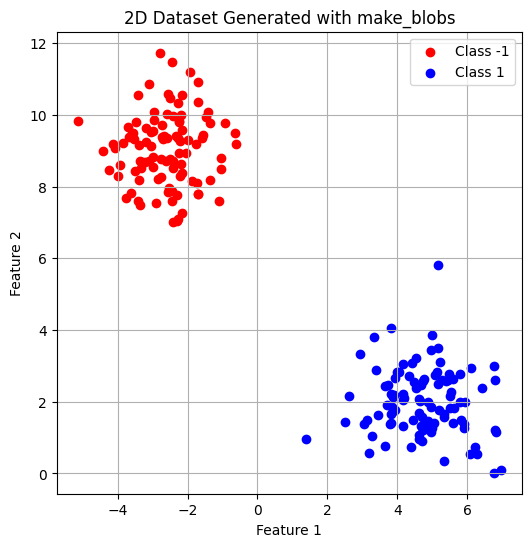

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#Generate dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)

#Convert labels: 0 → -1, 1 → 1
y = np.where(y == 0, -1, 1)

#Visualization
plt.figure(figsize=(6, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.title("2D Dataset Generated with make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

### Q2. Perceptron Implementation
1. Create a Python class `Perceptron` with:
   - `__init__` — initializes learning rate, number of epochs, and weights/bias.
   - `fit(X, y)` — trains the perceptron using the **Perceptron Learning Rule**.
   - `predict(X)` — returns predictions for given input features.
2. Use the update rule:  
$$
w \gets w + \eta (y_i - \hat{y}_i) x_i
$$
3. Train the Perceptron on your dataset.

**Your Task:**
- Implement and train the Perceptron.
- Display the final weights and bias.


In [29]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=10):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for epoch in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                # Linear output
                linear_output = np.dot(x_i, self.weights) + self.bias

                # Prediction: sign function → -1 or 1
                y_pred = np.where(linear_output >= 0, 1, -1)

                # Update rule: w ← w + η(y_i − y_pred) x_i
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

In [30]:
# ---- Train the Perceptron ----
perceptron = Perceptron(learning_rate=0.1, n_epochs=10)
perceptron.fit(X, y)

# Predictions
y_pred = perceptron.predict(X)

# Display final weights and bias
print("Final Weights:", perceptron.weights)
print("Final Bias:", perceptron.bias)

Final Weights: [ 2.07106485 -1.37615797]
Final Bias: 0.0


### Q3. Decision Boundary
1. Write a function to plot the decision boundary of your trained perceptron.
2. Visualize the boundary along with the dataset.

**Your Task:**
- Provide the decision boundary plot.
- Explain in **2–3 sentences** how the perceptron separates the two classes.


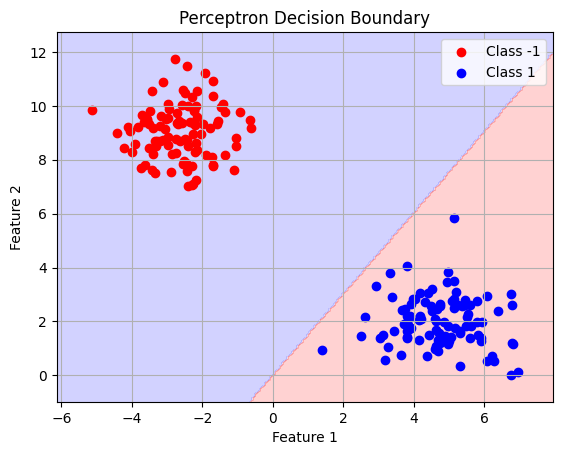

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Flatten grid & make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot filled contour for decision regions
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.bwr)

    # Plot original dataset
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, perceptron)

**Explanation (2–3 sentences):**

The perceptron separates two classes by finding a hyperplane that best divides the data points into their respective categories.

It adjusts the weights during training using the perceptron learning rule, moving the boundary until the classification errors are minimized.

Once trained, inputs on one side of the boundary are classified into one class, and those on the other side into the other class.

## Part 2 — Activation Functions

### Q4. Activation Function Implementation
Implement the following activation functions and their derivatives:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

**Your Task:**
- For each activation function:
  - Write the forward pass formula.
  - Write the derivative formula.

**Table: Activation Function Formulas & Derivatives**
| Function   | Formula | Derivative |
|------------|---------|------------|
| Sigmoid    |         |            |
| Tanh       |         |            |
| ReLU       |         |            |
| Leaky ReLU |         |            |
| Softmax    |         |            |


In [32]:
import numpy as np

# 1. Sigmoid
def sigmoid(x):
    # Forward Pass
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # Derivative w.r.t x
    s = sigmoid(x)
    return s * (1 - s)


# 2. Tanh
def tanh(x):
    # Forward Pass
    return np.tanh(x)

def tanh_derivative(x):
    # Derivative w.r.t x
    t = np.tanh(x)
    return 1 - t**2


# 3. ReLU
def relu(x):
    # Forward Pass
    return np.maximum(0, x)

def relu_derivative(x):
    # Derivative w.r.t x
    return np.where(x > 0, 1, 0)


# 4. Leaky ReLU
def leaky_relu(x, alpha=0.01):
    # Forward Pass
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    # Derivative w.r.t x
    return np.where(x > 0, 1, alpha)


# 5. Softmax
def softmax(x):
    # Forward Pass (numerically stable)
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def softmax_derivative(s):
    """
    s: softmax output (vector for one sample)
    Derivative is a Jacobian matrix: ds_i/dx_j
    """
    s = s.reshape(-1, 1)  # column vector
    return np.diagflat(s) - np.dot(s, s.T)


# ------------------ TEST ------------------
x = np.array([1.0, 2.0, 3.0])

print("Sigmoid:", sigmoid(x))
print("Sigmoid Derivative:", sigmoid_derivative(x))

print("\nTanh:", tanh(x))
print("Tanh Derivative:", tanh_derivative(x))

print("\nReLU:", relu(x))
print("ReLU Derivative:", relu_derivative(x))

print("\nLeaky ReLU:", leaky_relu(x))
print("Leaky ReLU Derivative:", leaky_relu_derivative(x))

print("\nSoftmax:", softmax(x))
print("Softmax Derivative :\n", softmax_derivative(softmax(x)))

Sigmoid: [0.73105858 0.88079708 0.95257413]
Sigmoid Derivative: [0.19661193 0.10499359 0.04517666]

Tanh: [0.76159416 0.96402758 0.99505475]
Tanh Derivative: [0.41997434 0.07065082 0.00986604]

ReLU: [1. 2. 3.]
ReLU Derivative: [1 1 1]

Leaky ReLU: [1. 2. 3.]
Leaky ReLU Derivative: [1. 1. 1.]

Softmax: [0.09003057 0.24472847 0.66524096]
Softmax Derivative :
 [[ 0.08192507 -0.02203304 -0.05989202]
 [-0.02203304  0.18483645 -0.1628034 ]
 [-0.05989202 -0.1628034   0.22269543]]


### Q5. Testing Activation Functions
1. Choose input values: `[-2, -1, 0, 1, 2]`.
2. Apply each activation function to these inputs.
3. Record the outputs in a table.

**Output Table:**
| Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax |
|-------|---------|------|------|------------|---------|
| -2    |         |      |      |            |         |
| -1    |         |      |      |            |         |
| 0     |         |      |      |            |         |
| 1     |         |      |      |            |         |
| 2     |         |      |      |            |         |


In [33]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_shifted = np.exp(x - np.max(x))  # stability fix
    return exp_shifted / np.sum(exp_shifted)

# Test inputs
inputs = np.array([-2, -1, 0, 1, 2], dtype=float)

# Compute outputs
sigmoid_out = sigmoid(inputs)
tanh_out = tanh(inputs)
relu_out = relu(inputs)
leaky_relu_out = leaky_relu(inputs)
softmax_out = softmax(inputs)

# Create table
import pandas as pd
df = pd.DataFrame({
    "Input": inputs,
    "Sigmoid": np.round(sigmoid_out, 4),
    "Tanh": np.round(tanh_out, 4),
    "ReLU": np.round(relu_out, 4),
    "Leaky ReLU": np.round(leaky_relu_out, 4),
    "Softmax": np.round(softmax_out, 4)
})

print(df.to_string(index=False))

 Input  Sigmoid    Tanh  ReLU  Leaky ReLU  Softmax
  -2.0   0.1192 -0.9640   0.0       -0.02   0.0117
  -1.0   0.2689 -0.7616   0.0       -0.01   0.0317
   0.0   0.5000  0.0000   0.0        0.00   0.0861
   1.0   0.7311  0.7616   1.0        1.00   0.2341
   2.0   0.8808  0.9640   2.0        2.00   0.6364


### Q6. Visualization of Activation Functions
1. Plot each activation function for input range `[-5, 5]`.
2. Compare their shapes visually.

**Your Task:**
- Provide the plots for all activation functions.
- In **3–4 sentences**, explain how the choice of activation function can affect learning in a neural network.


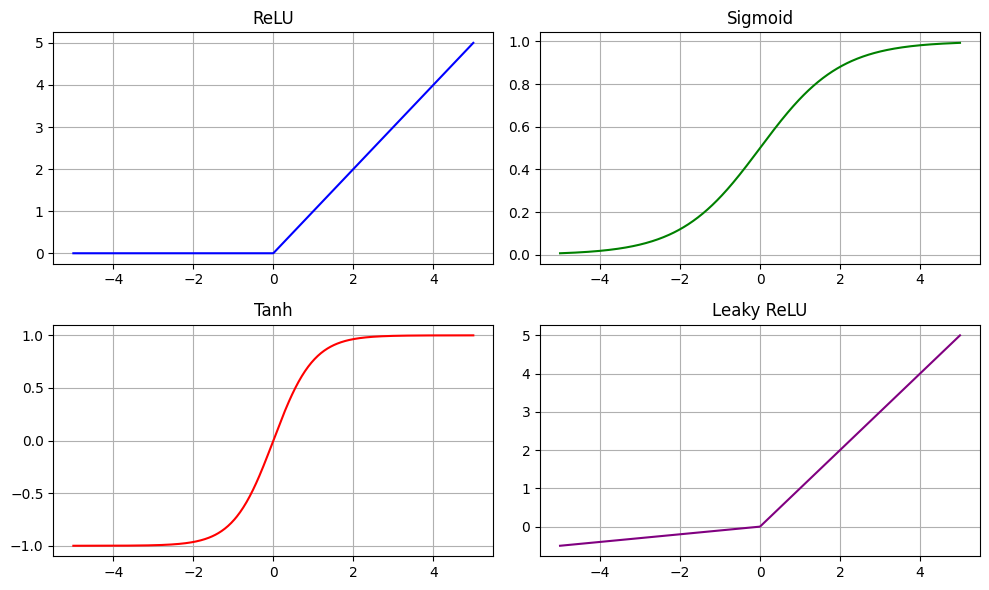

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Input range
x = np.linspace(-5, 5, 500)

# Activation functions
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
leaky_relu = np.where(x > 0, x, 0.1 * x)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(x, relu, label="ReLU", color="blue")
plt.title("ReLU")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, sigmoid, label="Sigmoid", color="green")
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, tanh, label="Tanh", color="red")
plt.title("Tanh")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu, label="Leaky ReLU", color="purple")
plt.title("Leaky ReLU")
plt.grid(True)

plt.tight_layout()
plt.show()

**Explanation (3–4 sentences):**

The activation function introduces non-linearity into the neural network, enabling it to learn complex patterns beyond simple linear relationships.

If the activation function saturates, gradients can become very small, slowing or even stopping learning.

Functions like ReLU avoid saturation in the positive region, speeding up convergence, but can suffer from dead neurons.

Choosing the right activation impacts the network’s ability to converge efficiently and generalize well.
